In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [167]:
torch.manual_seed(42)
np.random.seed(42)

In [168]:
df = pd.read_csv('data.csv')
df

,Date,1,2,3,4,5,6,7,8,9,...,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,Grand Total
0,22-Mar,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
1,23-Mar,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
2,24-Mar,208.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
3,25-Mar,68.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,26-Mar,46.0,48.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3-Oct,NaN,47.0,NaN,NaN,26.0,28.0,74.0,NaN,25.0,...,NaN,30.0,NaN,67.0,39.0,28.0,27.0,116.0,34.0,42
1287,4-Oct,NaN,30.0,NaN,NaN,18.0,21.0,104.0,NaN,21.0,...,NaN,25.0,6.0,40.0,30.0,28.0,23.0,61.0,NaN,32
1288,5-Oct,NaN,30.0,NaN,NaN,17.0,20.0,75.0,NaN,18.0,...,NaN,24.0,NaN,37.0,29.0,23.0,20.0,67.0,NaN,31
1289,6-Oct,NaN,26.0,NaN,NaN,13.0,18.0,35.0,NaN,18.0,...,NaN,22.0,NaN,26.0,26.0,23.0,19.0,34.0,NaN,24


In [169]:
df['temp_date'] = pd.to_datetime(df['Date'].astype(str) + '-2020', format='%d-%b-%Y')
years = []
current_year = 2017
prev_month = 3  

for idx, row in df.iterrows():
    current_month = row['temp_date'].month
    
    # Если текущий месяц меньше предыдущего (например, был Декабрь(12), стал Январь(1))
    if current_month < prev_month:
        current_year += 1
    
    # Собираем правильную дату с нужным годом
    try:
        full_date = row['temp_date'].replace(year=current_year)
    except ValueError:
        # Это сработает, если мы пытаемся поставить 29 февраля в невисокосный год (2018, 2019).
        # Но в вашем случае 29 февраля должно быть только в 2020-м.
        full_date = row['temp_date'].replace(year=2020) 
        
    years.append(full_date)
    prev_month = current_month

# 4. Сохраняем результат
df['Correct_Date'] = years
df.set_index('Correct_Date', inplace=True)

print("Готово! Диапазон дат:", df.index.min(), "—", df.index.max())

Готово! Диапазон дат: 2017-03-22 00:00:00 — 2020-10-07 00:00:00


In [170]:
print(df.columns.tolist())

['Date', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '104', '105', '106', '108', '3269728', '4372603', '4438736', '4439094', '4439475', '5901326', '5917712', '7723955', '30369354', '34703847', '36200067', '36671067', '37052366', '38834077', '39168240', '39379024', 'Grand Total', 'temp_date']


In [171]:
drop_col = ['Date', 'Grand Total', 'temp_date']
df_dropped = df.drop(drop_col, axis=1)
df_dropped

,1,2,3,4,5,6,7,8,9,10,...,5917712,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024
Correct_Date,,,,,,,,,,,,,,,,,,,,,
2017-03-22,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-23,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-24,208.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-25,68.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-26,46.0,48.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-03,NaN,47.0,NaN,NaN,26.0,28.0,74.0,NaN,25.0,NaN,...,33.0,NaN,30.0,NaN,67.0,39.0,28.0,27.0,116.0,34.0
2020-10-04,NaN,30.0,NaN,NaN,18.0,21.0,104.0,NaN,21.0,NaN,...,23.0,NaN,25.0,6.0,40.0,30.0,28.0,23.0,61.0,NaN
2020-10-05,NaN,30.0,NaN,NaN,17.0,20.0,75.0,NaN,18.0,NaN,...,22.0,NaN,24.0,NaN,37.0,29.0,23.0,20.0,67.0,NaN


In [172]:
missing_data = df_dropped.isna().mean()
stable_sensors = missing_data[missing_data<0.10].index.tolist()
print(f'stable sensors are {stable_sensors}')

stable sensors are ['2', '5', '6', '9', '12']


In [173]:
df_final = df_dropped[['2', '5', '6', '9', '12']]

In [174]:
df_final = df_final.interpolate(method='linear').fillna(method='bfill')
df_final

/var/folders/hd/hqx41svd20lcfdp6nt85c0j80000gn/T/ipykernel_1370/4107066173.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final = df_final.interpolate(method='linear').fillna(method='bfill')


,2,5,6,9,12
Correct_Date,,,,,
2017-03-22,92.0,19.0,34.0,17.0,30.0
2017-03-23,85.0,19.0,34.0,17.0,30.0
2017-03-24,44.0,19.0,34.0,17.0,30.0
2017-03-25,59.0,19.0,34.0,17.0,30.0
2017-03-26,48.0,19.0,34.0,17.0,30.0
...,...,...,...,...,...
2020-10-03,47.0,26.0,28.0,25.0,30.0
2020-10-04,30.0,18.0,21.0,21.0,30.0
2020-10-05,30.0,17.0,20.0,18.0,26.0


In [175]:
df_final.isna().sum().sum()

np.int64(0)

In [176]:
expected_range = pd.date_range(start=df_final.index.min(), end=df_final.index.max(), freq='D')

missing_dates = expected_range.difference(df_final.index)
cnt = len(missing_dates)

if cnt == 0:
    print("No missed dates")
else:
    print(f"Missed that many dates {cnt}")
    print("Missing dates ", missing_dates)

Missed that many dates 5
Missing dates  DatetimeIndex(['2017-04-04', '2017-04-05', '2017-04-06', '2018-08-31',
               '2018-10-31'],
              dtype='datetime64[ns]', freq=None)


In [177]:
df_final = df_final.asfreq('D')
df_final.isna().sum().sum()

np.int64(25)

In [178]:
#we will fill this dates by using linear method 
df_final = df_final.interpolate(method='linear')
df_final

,2,5,6,9,12
Correct_Date,,,,,
2017-03-22,92.0,19.0,34.0,17.0,30.0
2017-03-23,85.0,19.0,34.0,17.0,30.0
2017-03-24,44.0,19.0,34.0,17.0,30.0
2017-03-25,59.0,19.0,34.0,17.0,30.0
2017-03-26,48.0,19.0,34.0,17.0,30.0
...,...,...,...,...,...
2020-10-03,47.0,26.0,28.0,25.0,30.0
2020-10-04,30.0,18.0,21.0,21.0,30.0
2020-10-05,30.0,17.0,20.0,18.0,26.0


In [179]:
print("Mean:", np.mean(df_final))
print("Median:", np.median(df_final))
print("Standard Deviation:", np.std(df_final))
print("Min/Max:", np.min(df_final), "/", np.max(df_final))

Mean: 37.100741736360014
Median: 25.0
Standard Deviation: 2     44.764981
5     49.225111
6     38.867120
9     25.848316
12    15.984471
dtype: float64
Min/Max: 2.0 / 851.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


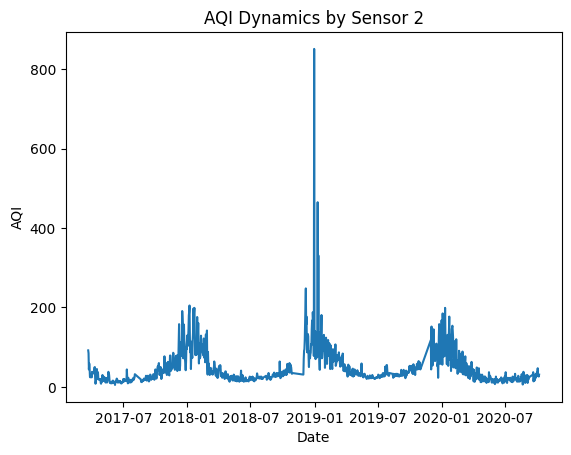

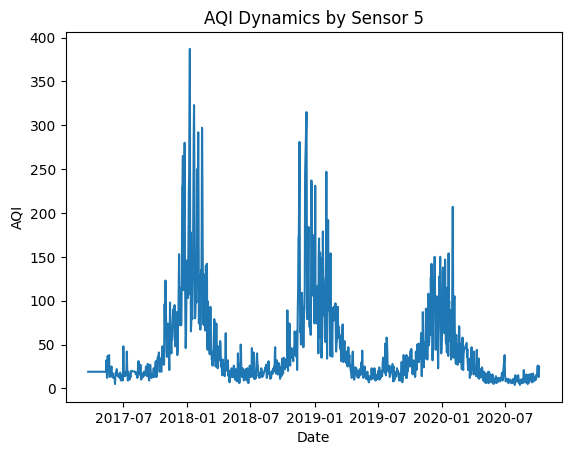

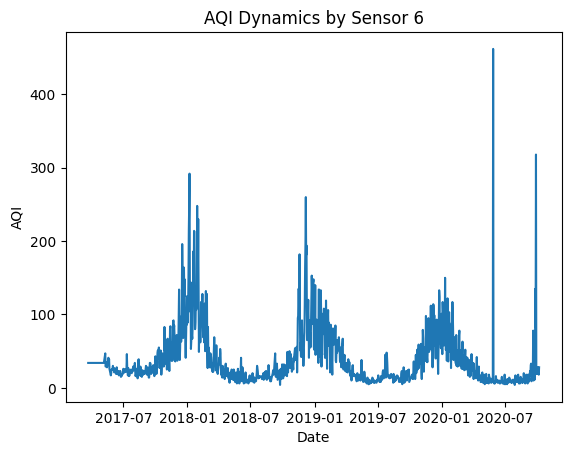

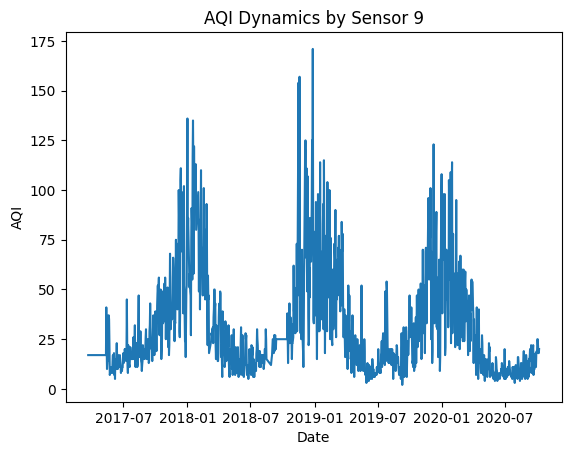

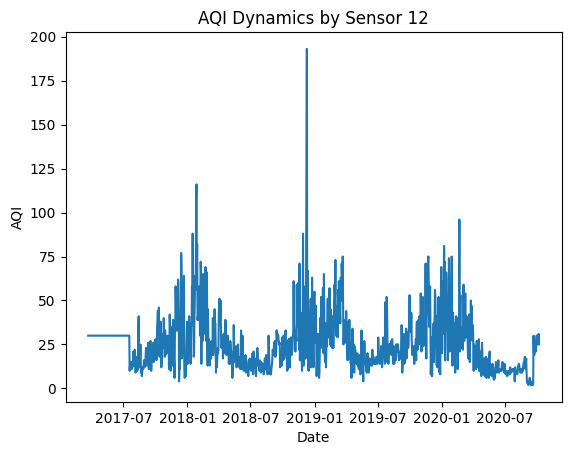

In [180]:
#plot
for sensor in stable_sensors:
    plt.plot(df_final.index, df_final[sensor], label = f'Sensor {sensor}')
    plt.xlabel("Date")
    plt.ylabel('AQI')
    plt.title(f'AQI Dynamics by Sensor {sensor}')
    plt.show()

In [181]:
df_final['2'].isna().sum()

np.int64(0)

In [182]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps,sensor_name):
    df = dc(df)
    df = df[[sensor_name]]
    for i in range(1, n_steps+1):
        df[f'{sensor_name}(t-{i})'] = df[sensor_name].shift(i)

    df.dropna(inplace=True)

    return df
lookback = 7

['2', '5', '6', '9', '12']

df_2 = prepare_dataframe_for_lstm(df_final, lookback,'2')
df_5 = prepare_dataframe_for_lstm(df_final, lookback,'5')
df_6 = prepare_dataframe_for_lstm(df_final, lookback,'6')
df_9 = prepare_dataframe_for_lstm(df_final, lookback,'9')
df_12= prepare_dataframe_for_lstm(df_final, lookback,'12')
df_2

,2,2(t-1),2(t-2),2(t-3),2(t-4),2(t-5),2(t-6),2(t-7)
Correct_Date,,,,,,,,
2017-03-29,31.0,24.0,26.0,48.0,59.0,44.0,85.0,92.0
2017-03-30,30.0,31.0,24.0,26.0,48.0,59.0,44.0,85.0
2017-03-31,31.0,30.0,31.0,24.0,26.0,48.0,59.0,44.0
2017-04-01,24.0,31.0,30.0,31.0,24.0,26.0,48.0,59.0
2017-04-02,38.0,24.0,31.0,30.0,31.0,24.0,26.0,48.0
...,...,...,...,...,...,...,...,...
2020-10-03,47.0,36.0,36.0,27.0,26.0,28.0,33.0,21.0
2020-10-04,30.0,47.0,36.0,36.0,27.0,26.0,28.0,33.0
2020-10-05,30.0,30.0,47.0,36.0,36.0,27.0,26.0,28.0


In [183]:
shifted_df_2_as_np = df_2.to_numpy()
shifted_df_2_as_np

array([[31., 24., 26., ..., 44., 85., 92.],
       [30., 31., 24., ..., 59., 44., 85.],
       [31., 30., 31., ..., 48., 59., 44.],
       ...,
       [30., 30., 47., ..., 27., 26., 28.],
       [26., 30., 30., ..., 36., 27., 26.],
       [31., 26., 30., ..., 36., 36., 27.]])

In [184]:
shifted_df_2_as_np.shape

(1289, 8)

In [185]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
shifted_df_2_as_np = scaler.fit_transform(shifted_df_2_as_np)
shifted_df_2_as_np'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler(feature_range=(-1,1))\nshifted_df_2_as_np = scaler.fit_transform(shifted_df_2_as_np)\nshifted_df_2_as_np'

In [186]:
X = shifted_df_2_as_np[:, 1:]
y = shifted_df_2_as_np[:, 0]
X.shape, y.shape

((1289, 7), (1289,))

In [187]:
X = dc(np.flip(X, axis=1))
X

array([[92., 85., 44., ..., 48., 26., 24.],
       [85., 44., 59., ..., 26., 24., 31.],
       [44., 59., 48., ..., 24., 31., 30.],
       ...,
       [28., 26., 27., ..., 36., 47., 30.],
       [26., 27., 36., ..., 47., 30., 30.],
       [27., 36., 36., ..., 30., 30., 26.]])

In [188]:
split_index = int(len(X)*0.85)
split_index

1095

In [189]:
'''X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape'''

'X_train = X[:split_index]\nX_test = X[split_index:]\n\ny_train = y[:split_index]\ny_test = y[split_index:]\n\nX_train.shape, X_test.shape, y_train.shape, y_test.shape'

In [191]:
split_index = int(len(shifted_df_2_as_np) * 0.80)

train_data = shifted_df_2_as_np[:split_index]
test_data = shifted_df_2_as_np[split_index:]

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_scaled = scaler.fit_transform(train_data)

In [193]:
# 3. TRANSFORM TEST DATA (Do not fit!)
test_data_scaled = scaler.transform(test_data)

# 4. SEPARATE X (features) and y (target)
X_train = train_data_scaled[:, 1:] # All columns except first
y_train = train_data_scaled[:, 0]  # First column is target

X_test = test_data_scaled[:, 1:]
y_test = test_data_scaled[:, 0]

# 5. FLIP X to have chronological order (oldest to newest)
from copy import deepcopy as dc
X_train = dc(np.flip(X_train, axis=1))
X_test = dc(np.flip(X_test, axis=1))

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 1031
Testing samples: 258


In [194]:
# Reshape for LSTM: (samples, timesteps, features)
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

print("After reshaping:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

After reshaping:
X_train: (1031, 7, 1)
X_test: (258, 7, 1)
y_train: (1031, 1)
y_test: (258, 1)


In [195]:
'''X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape'''

'X_train = X_train.reshape((-1, lookback, 1))\nX_test = X_test.reshape((-1, lookback, 1))\n\ny_train = y_train.reshape((-1, 1))\ny_test = y_test.reshape((-1, 1))\n\nX_train.shape, X_test.shape, y_train.shape, y_test.shape'

In [196]:
'''X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape'''

'X_train = torch.tensor(X_train).float()\ny_train = torch.tensor(y_train).float()\nX_test = torch.tensor(X_test).float()\ny_test = torch.tensor(y_test).float()\n\nX_train.shape, X_test.shape, y_train.shape, y_test.shape'

In [197]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

print("Converted to PyTorch tensors")

Converted to PyTorch tensors


In [198]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [199]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_data_scaled, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [202]:
'''device = 'mps' if torch.backends.mps.is_available() else 'cpu'

print(f"Using device: {device}")'''
device = 'cpu'

In [203]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([8]) torch.Size([8])


In [204]:
'''class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model'''

'class LSTM(nn.Module):\n    def __init__(self, input_size, hidden_size, num_stacked_layers):\n        super().__init__()\n        self.hidden_size = hidden_size\n        self.num_stacked_layers = num_stacked_layers\n\n        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,\n                            batch_first=True)\n\n        self.fc = nn.Linear(hidden_size, 1)\n\n    def forward(self, x):\n        batch_size = x.size(0)\n        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)\n        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)\n\n        out, _ = self.lstm(x, (h0, c0))\n        out = self.fc(out[:, -1, :])\n        return out\n\nmodel = LSTM(1, 4, 1)\nmodel.to(device)\nmodel'

In [205]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)#short term memory
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)#long term memory

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 64, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [206]:
learning_rate = 0.001
num_epochs = 200

loss_function = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-2)

Хороший случай: Оба лосса (и тренировочный, и валидационный) плавно падают и находятся близко друг к другу. Это значит, что модель реально находит закономерности.

Overfitting (Переобучение): Train Loss продолжает падать (модель «зубрит» тренировочные данные), а Validation Loss начинает расти. Это сигнал, что модель просто запомнила шум в данных и не сможет работать в реальном мире.

Underfitting (Недообучение): Оба лосса высокие и не уменьшаются. Модель слишком простая для этой задачи (например, когда вы использовали всего 4 нейрона для прогноза на 30 дней).

In [207]:
def train_one_epoch():
    model.train()
    running_loss = 0.0
    
    for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_pred = model(X_batch)
        loss = loss_function(y_pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    return running_loss / len(train_loader)

def validate():
    model.eval()
    running_loss = 0.0
    
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            y_pred = model(X_batch)
            loss = loss_function(y_pred, y_batch)
            running_loss += loss.item()
    
    return running_loss / len(test_loader)

In [208]:
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss = train_one_epoch()
    val_loss = validate()
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

ValueError: too many values to unpack (expected 2)

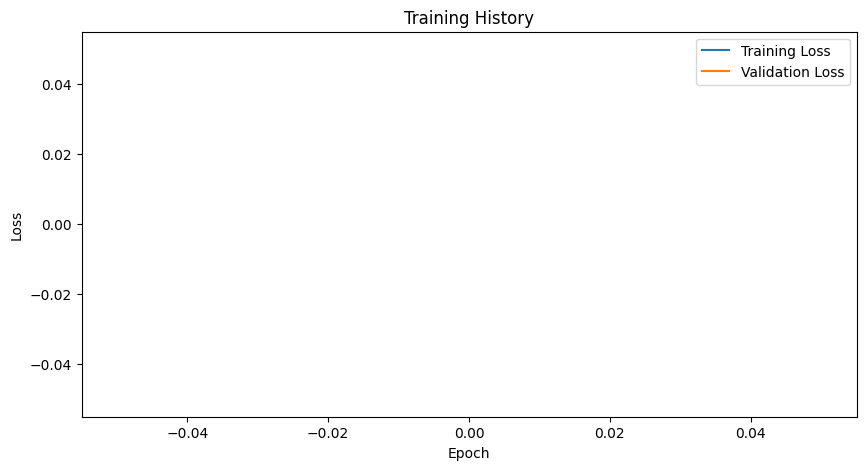

In [209]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
    train_predictions = model(X_train.to(device)).cpu().numpy()
    train_predictions = scaler.inverse_transform(
        np.concatenate((train_predictions, np.zeros((len(train_predictions), lookback))), axis=1)
    )[:, 0]
    
    # Get actual training values
    y_train_actual = scaler.inverse_transform(
        np.concatenate((y_train.numpy(), np.zeros((len(y_train), lookback))), axis=1)
    )[:, 0]

In [ ]:
# Get predictions on test set
with torch.no_grad():
    test_predictions = model(X_test.to(device)).cpu().numpy()
    test_predictions = scaler.inverse_transform(
        np.concatenate((test_predictions, np.zeros((len(test_predictions), lookback))), axis=1)
    )[:, 0]
    
    # Get actual test values
    y_test_actual = scaler.inverse_transform(
        np.concatenate((y_test.numpy(), np.zeros((len(y_test), lookback))), axis=1)
    )[:, 0]

In [ ]:
# Plot results
plt.figure(figsize=(15, 5))

# Get dates for plotting
train_dates = shifted_df_2_as_np.index[:split_index]
test_dates = shifted_df_2_as_np.index[split_index:]

plt.plot(train_dates, y_train_actual, label='Train Actual', alpha=0.7)
plt.plot(train_dates, train_predictions, label='Train Predictions', alpha=0.7)
plt.plot(test_dates, y_test_actual, label='Test Actual', alpha=0.7)
plt.plot(test_dates, test_predictions, label='Test Predictions', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Predictions vs Actual')
plt.legend()
plt.show()